## <center><b>Programming</b></center>

### **Loading dataset**

In [2]:
import pandas as pd

# Loading dataset
df = pd.read_csv('accounts.csv')

# Selects the first 8 features and remove duplicates and null values
df = df.iloc[:, :8].drop_duplicates().dropna()

# Change the feature type from categorical to numerical
data_numerical = pd.get_dummies(df, drop_first=True)

### **Exercício 1**

### **a)**

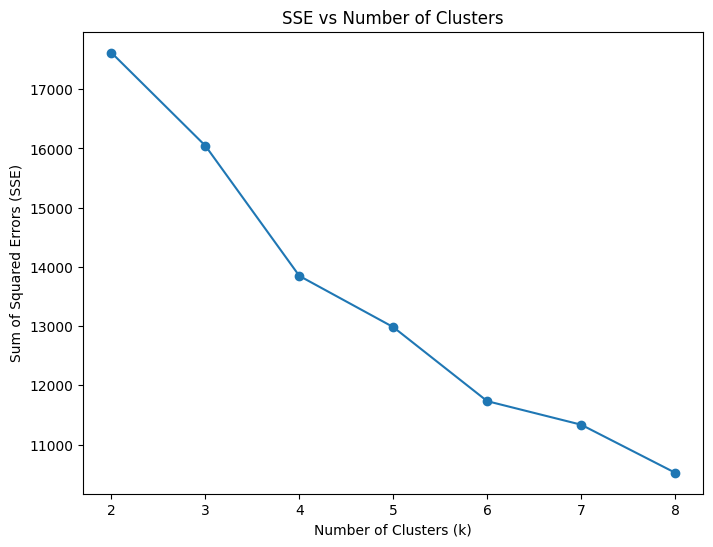

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numerical)

k_values = [2, 3, 4, 5, 6, 7, 8]

# Store the SSE (Inertia) values for each k
sse = []

# Apply KMeans for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared errors

# Plotting the SSE values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs Number of Clusters')
plt.show()


### **b)**

Com base no gráfico, o número ideal de clusters parece ser 4, pelo facto de o declive da curva começar a diminuir (em valor absoluto). Isto indica que a adição de mais clusters não baixa suficientemente o valor do SSE para se justificar aumentar a complexidade do modelo. Assim, com 4 clusters atinge-se um equilíbrio entre divisão dos dados e simplicidade do modelo.

### **c)**

Sim, o k-modes é a abordagem mais adequada para conjuntos de dados predominantemente categóricos. Isso deve-se ao fato de que, neste caso, a utilização da moda para cálculos do algoritmo é mais apropriada do que a média, que é utilizada no k-means. A moda permite uma representação mais fiel das características dos dados categóricos, resultando num clustering mais eficaz.

### **Exercício 2**

#### **a)**

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_numerical)  # Scale the feature data

# Apply PCA
pca = PCA(n_components=2)  # We want the top 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance
explained_variance = pca.explained_variance_ratio_

# Output the variance explained by the top 2 components
total_variance_explained = explained_variance[0] + explained_variance[1]
print(f"Variability explained by the top 2 components: {total_variance_explained:.2f}")


Variability explained by the top 2 components: 0.22755012102819172


#### **b)**

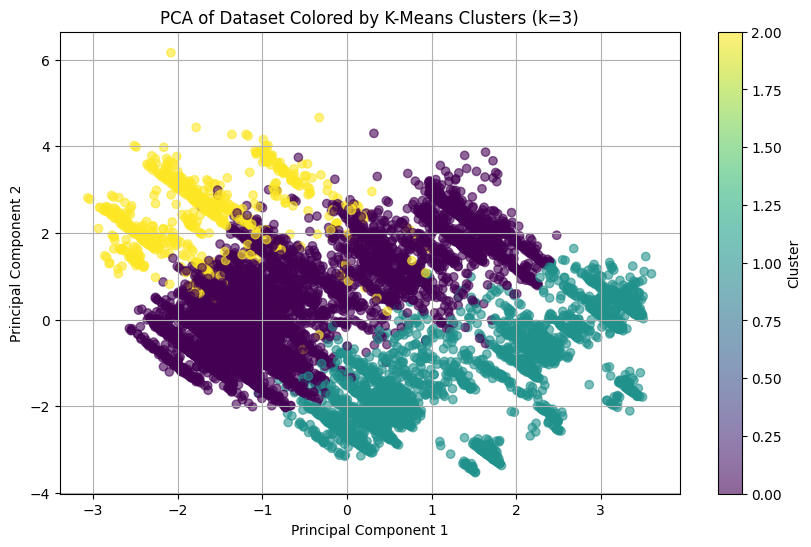

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numerical)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Create scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('PCA of Dataset Colored by K-Means Clusters (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()



Não conseguimos separar os clusters de forma clara. A proximidade dos clusters obtidos pelo k-means (com k=3) pode ser explicada pelo facto de apenas 23% da variabilidade ter sido capturada pelas duas principais componentes principais no PCA. Este valor baixo indica que as componentes não refletem adequadamente a informação total do conjunto de dados, sugerindo uma estrutura complexa que não é bem representada na projeção bidimensional. Como resultado, muitos padrões e interações relevantes entre as variáveis permanecem não capturados, comprometendo a separação entre os clusters. Assim, a proximidade dos pontos dentro dos clusters deve-se à falta de distinção clara nas características que realmente importam.

### **c)**

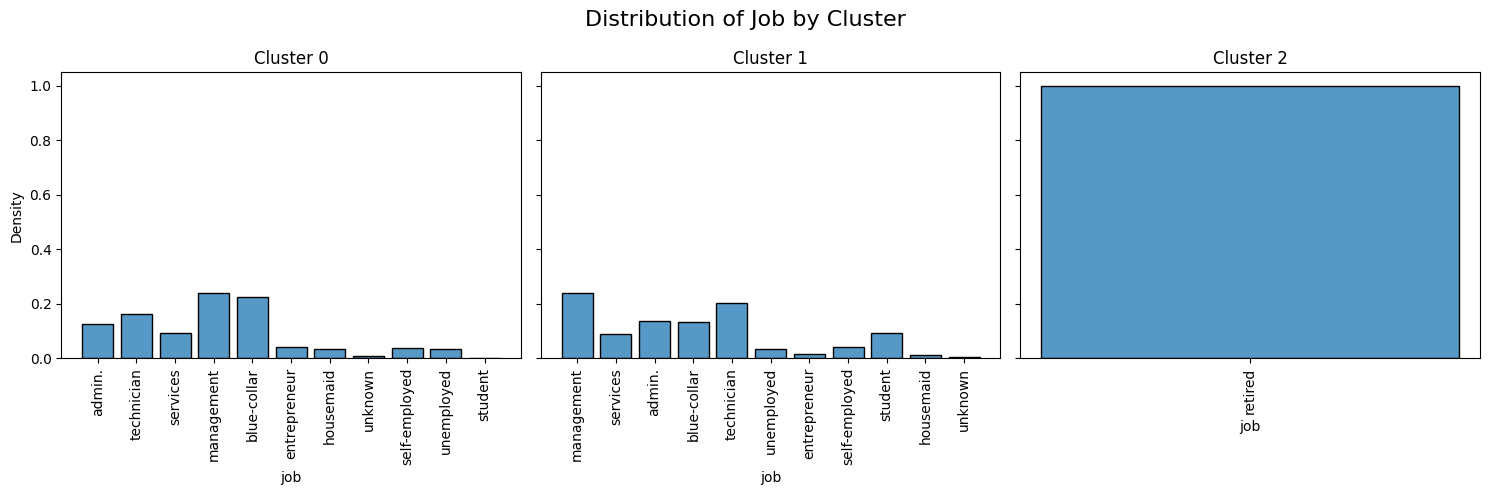

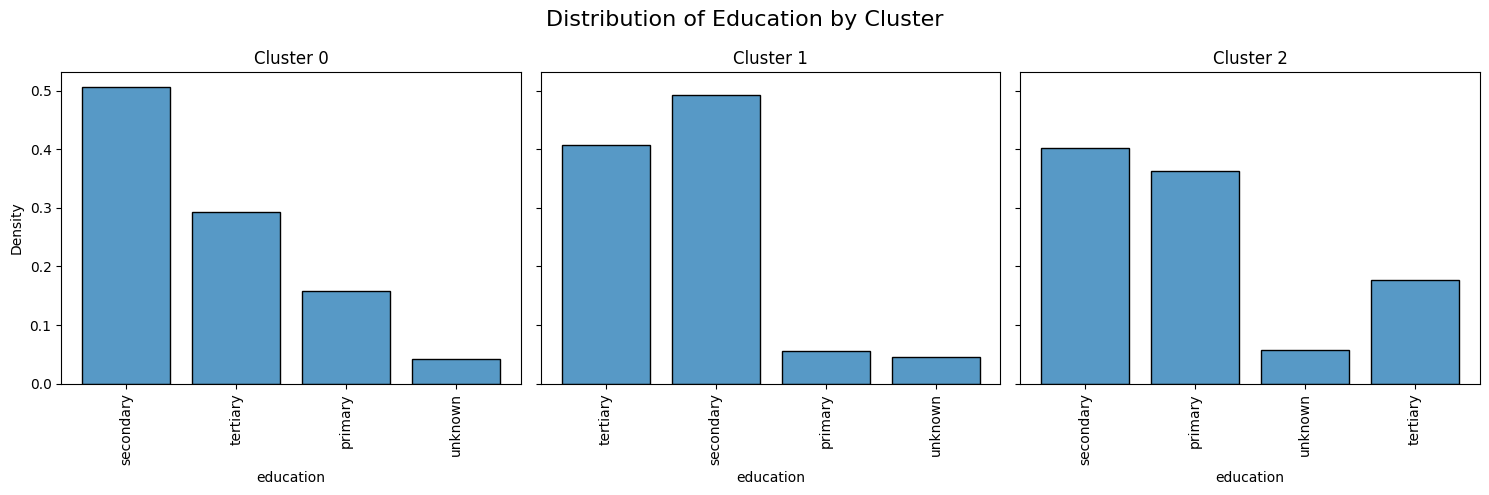

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numerical)

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['clusters'] = clusters

fig, axes = plt.subplots(1, k, figsize=(15, 5), sharey=True)
for cluster, ax in enumerate(axes):
    sns.histplot(
        data=df[df['clusters'] == cluster], 
        x='job',
        multiple="dodge",
        stat='density',
        shrink=0.8,
        common_norm=False,
        ax=ax
    )
    ax.set_title(f'Cluster {cluster}')
    ax.tick_params(axis='x', rotation=90)

plt.suptitle('Distribution of Job by Cluster', fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, k, figsize=(15, 5), sharey=True)
for cluster, ax in enumerate(axes):
    sns.histplot(
        data=(df[df['clusters'] == cluster]), 
        x='education',
        multiple="dodge",
        stat='density',
        shrink=0.8,
        common_norm=False,
        ax=ax
    )
    ax.set_title(f'Cluster {cluster}')
    ax.tick_params(axis='x', rotation=90)

plt.suptitle('Distribution of Education by Cluster', fontsize=16)
plt.tight_layout()
plt.show()

Os gráficos apresentam a distribuição das categorias de emprego e educação em quatro clusters (0, 1 e 2).

Relativamente à distribuição de empregos, verificamos que os clusters 0 e 1 são amplamente dominado por gestores, técnicos, operários e administradores, sendo que o resto das atividades aparece em menor quantidade e pode ser desprezado. O cluster 2 só contém reformados.

Relativamente à distribuição de educação, verificamos que o cluster 0 possui cerca de metade das pessoas com o ensino secundário, um terço com o ensino superior e uma percentagem baixa de pessoas com o ensino primário. O cluster 1 possui quase só pessoas com o ensino superior e secundário. No cluster 2, predominam pessoas com educação secundária e primária, havendo também algumas (em menor quantidade) com o ensino superior.

Podemos, portanto, concluir que os três clusters representam grupos de indivíduos com características distintas. Os Clusters 0 e 1 são compostos principalmente por pessoas em cargos de gestão, técnicos, operários e administração, com um nível de educação relativamente alto (ensino superior e secundário). O Cluster 2 é composto apenas por reformados, no qual se verifica um grau de educação mais baixo (predominantemente primário e secundário).